In [1]:
import random

def random_01():
    rand_int = 1
    if random.random() < 0.5:        
        rand_int = 0       
        
    return rand_int

def create_vector(n):
    individual = [random.randint(0, 1) for _ in range(n)]
    return individual

In [2]:
vector1 = create_vector(10)
print(vector1)

[0, 0, 0, 0, 1, 1, 0, 1, 0, 1]


In [3]:
# fitness function
def secret(vector):
    return sum(vector)

In [4]:
score1 = secret(vector1)
print(score1)

4


In [2]:
# vector length
n = 10  # problem size
m = 8   # number of workers

vector = create_vector(n)
print(vector)

fitness = secret(vector)
print(fitness)

[0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
7


In [5]:
# vector length
n = 10  # problem size
m = 8   # number of workers

def generate_vectors(n, m):
    vectors = [create_vector(n) for _ in range(m)]            
    return vectors

def print_vectors(vectors, m):
    for i in range(m):
        print(vectors[i])

In [6]:
vectors = generate_vectors(n, m)
print_vectors(vectors, m)

[1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
[1, 0, 0, 0, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1]


In [7]:
# fitness function
def compute_fitness(vectors):
    fitnesses = [secret(vector) for vector in vectors]
    return fitnesses

In [8]:
fitnesses = compute_fitness(vectors)
print(fitnesses)

[3, 5, 8, 4, 4, 4, 5, 7]


In [7]:
# method 1: generate one set

n = 15
m = 8

vectors = generate_vectors(n, m)
print_vectors(vectors, m)

fitnesses = compute_fitness(vectors)
print('fitnesses: ', fitnesses)

[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
fitnesses:  [8, 8, 7, 7, 9, 11, 9, 7]


In [8]:
# method 2: Generate different groups of m vectors

n = 15
m = 8

# k loops
k = 15

for _ in range(k):
    vectors   = generate_vectors(n, m)
    fitnesses = compute_fitness(vectors)
    max_score = max(fitnesses)
    print(max_score, fitnesses)

11 [6, 8, 6, 8, 8, 11, 7, 8]
10 [6, 10, 3, 5, 5, 7, 7, 9]
10 [7, 7, 10, 6, 7, 7, 4, 10]
11 [6, 7, 7, 11, 5, 8, 9, 3]
9 [8, 7, 9, 6, 6, 6, 6, 6]
13 [11, 6, 8, 8, 5, 13, 7, 8]
9 [9, 7, 4, 6, 6, 4, 6, 7]
9 [8, 7, 8, 8, 8, 9, 7, 6]
10 [8, 6, 8, 4, 8, 10, 8, 7]
9 [4, 6, 9, 8, 7, 9, 8, 7]
10 [8, 7, 9, 5, 10, 8, 7, 7]
9 [7, 5, 9, 6, 8, 8, 7, 7]
11 [8, 9, 10, 8, 4, 6, 5, 11]
12 [9, 8, 5, 5, 5, 12, 9, 11]
10 [8, 9, 6, 10, 8, 4, 4, 10]


In [9]:
n = 10
m = 8

# k loops
k = 60

list_of_fitnesses = []
for _ in range(k):
    # gather workers and assign locations randomly
    vectors   = generate_vectors(n, m)
    
    # look at their clocks
    fitnesses = compute_fitness(vectors)
    
    # get max
    max_fitness = max(fitnesses)
    list_of_fitnesses.append(max_fitness)

Text(0.5, 1.0, 'Fitness values for 60 iterations')

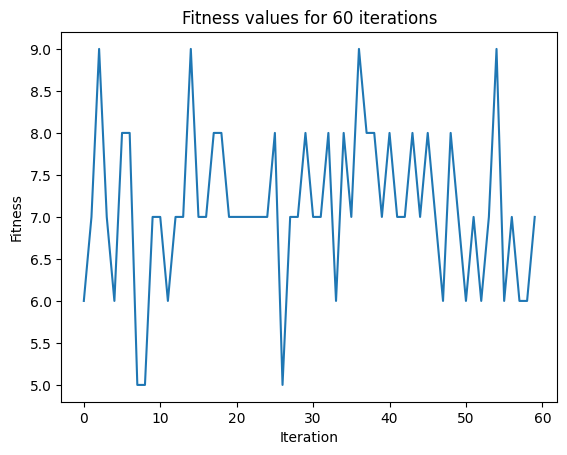

In [10]:
import matplotlib.pyplot as plt

plt.plot(list_of_fitnesses)
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.title('Fitness values for 60 iterations')